# Import packages 

In [0]:
import warnings
warnings.filterwarnings('ignore')

from keras.layers import Input, Dense, Flatten, Dropout
from keras.models import Model
import plotly.figure_factory as ff


import numpy as np
import pandas as pd
import os

import random
from collections import deque
import matplotlib.pylab as plt

Using TensorFlow backend.


# Load data


In [0]:
# !pip install yfinance
import yfinance as yf
data = yf.download("AAPL ADSK EBAY FB GOOGL INTC INTU NFLX ORCL IBM", start="2015-01-01", end="2018-01-01").Close
train_data = data.loc['2015-01-01':'2017-01-01']
test_data = data.loc['2017-01-01':'2018-01-01']

[*********************100%***********************]  10 of 10 completed


In [0]:
fig =  ff.create_table(data.head())
fig.show()

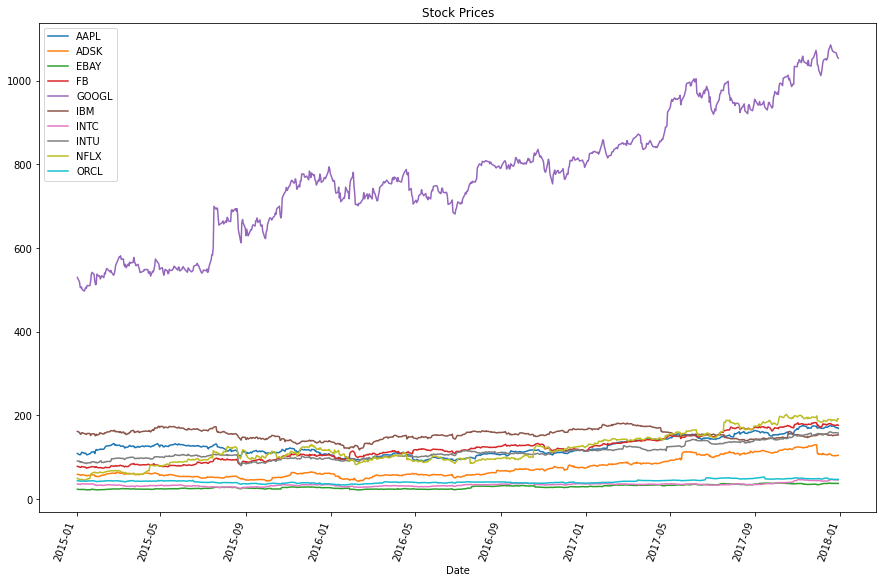

In [0]:
fig = plt.figure(figsize=(15,10))

for i, col in enumerate(data.columns):
    data[col].plot()
plt.title('Stock Prices')

plt.xticks(rotation=70)
plt.legend(data.columns)

#Saving the graph into a JPG file
plt.savefig('foo1.png', bbox_inches='tight')

# Markowitz Efficient Froentier

<Figure size 1080x1080 with 0 Axes>

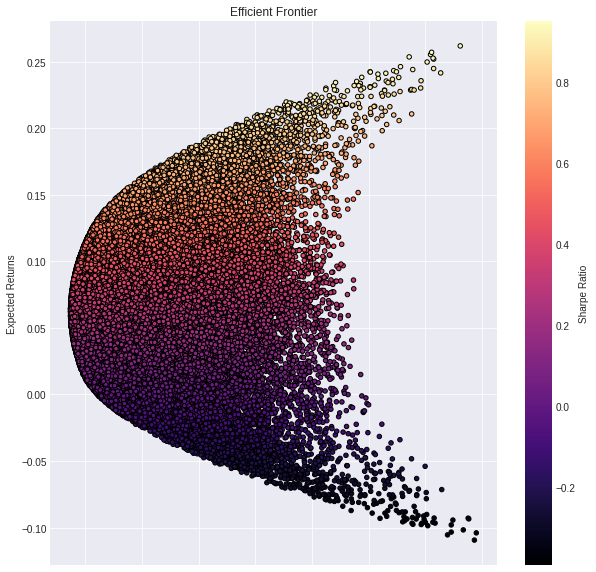

In [0]:
selected = ["IBM", "F", "JPM", "NKE"]
table = train_data[selected] 
table = table.sort_values(by = 'Date',ascending = True).dropna()

# calculate daily and annual returns of crypto
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 365

# get daily and covariance of returns of crypto
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 365

# returns, volatility and weights of portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

num_assets = len(selected)
num_portfolios = 100000

np.random.seed(101)

for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dict with Returns and Risk values of portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# create dataframe
df = pd.DataFrame(portfolio)

# change labels
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder columns
df = df[column_order]
fig = plt.figure(figsize=(15,15))
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='magma', edgecolors='black', figsize=(10, 10), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.savefig('foo2.png', bbox_inches='tight')

# Traditional strategies


In [0]:
ASSETS = 10
D_FIT = 30
D_HOLD = 30
env = Environment(test_data)

In [0]:
agent_max_returns = MaximizedReturnsAgent(ASSETS, allow_short=True)
agent_minvar = MinimalVarianceAgent(ASSETS, allow_short=True)
agent_maxsharpe = MaximizedSharpeAgent(ASSETS, allow_short=True)
agent_maxdecorr = MaximizedDecorrelationAgent(ASSETS, allow_short=True)

In [0]:
result_equal, result_returns, result_minvar, result_maxsharpe, result_maxdecorr = [], [], [], [], []

def append_results(state_action, action, results_list):
    result = np.dot(state_action, action)
    results_list.append(result.tolist())

for i in range(D_FIT, len(env.data), D_HOLD):
    state = env.get_state(i, D_FIT, is_cov_matrix=False)
    
    action_equal = np.ones(ASSETS) / ASSETS
    action_minvar = agent_minvar.get_action(state)
    action_max_returns = agent_max_returns.get_action(state)
    action_maxsharpe = agent_maxsharpe.get_action(state)
    action_maxdecorr = agent_maxdecorr.get_action(state)
 
    state_action = env.get_state(i+D_HOLD, D_HOLD, is_cov_matrix=False) 

    # UCRP
    append_results(state_action, action_equal, result_equal) 

    #  Minimum Variance
    append_results(state_action, action_minvar, result_minvar)

    # Maximized returns
    append_results(state_action, action_max_returns, result_returns)

    # Maximum Sharpe
    append_results(state_action, action_maxsharpe, result_maxsharpe)

    # Maximum Decorrelation
    append_results(state_action, action_maxdecorr, result_maxdecorr)


In [0]:
result_equal_vis = [item for sublist in result_equal for item in sublist]
result_returns_vis = [item for sublist in result_returns for item in sublist]
result_minvar_vis = [item for sublist in result_minvar for item in sublist]
result_maxsharpe_vis = [item for sublist in result_maxsharpe for item in sublist]
result_maxdecorr_vis = [item for sublist in result_maxdecorr for item in sublist]

# RL Agent. Train

In [0]:
ASSETS = 10
agent = Agent(ASSETS, 0.2, 0.01, 0.0005 )
env = Environment(train_data)

In [0]:
D_FIT = 30
EPISODES = 100
BATCH = 32
REBALANCE = 30

Episode 0/100 epsilon 0.2


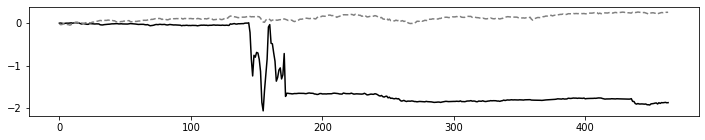

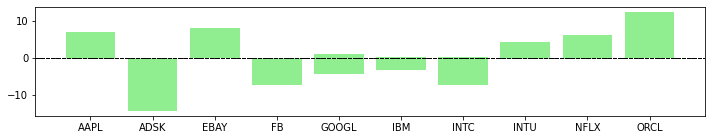

Episode 1/100 epsilon 0.2


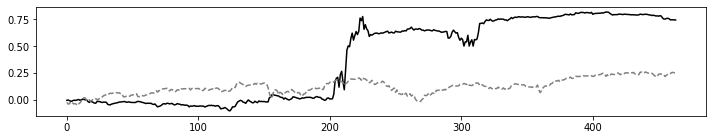

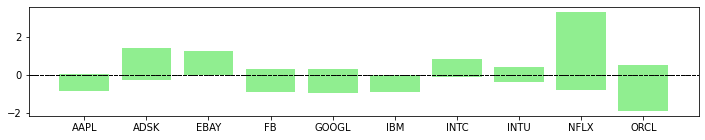

Episode 2/100 epsilon 0.1995


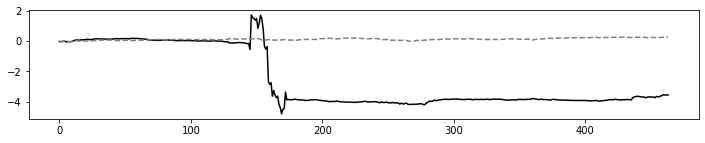

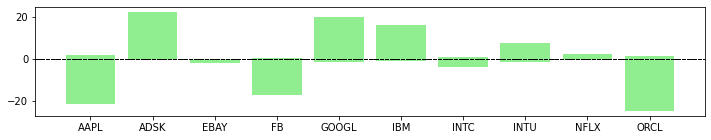

Episode 3/100 epsilon 0.1995


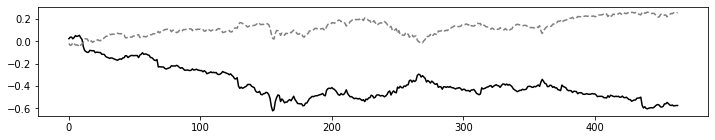

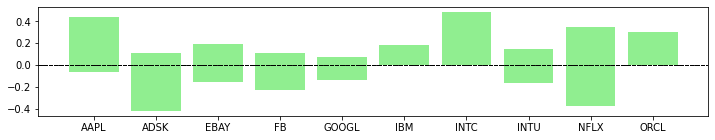

Episode 4/100 epsilon 0.199


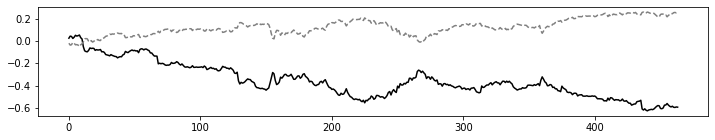

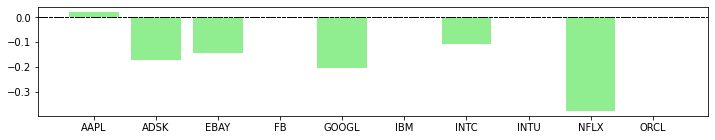

Episode 5/100 epsilon 0.199


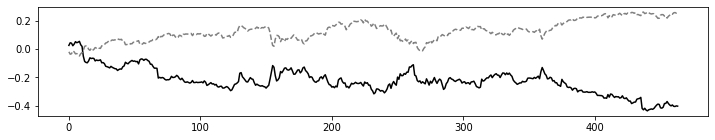

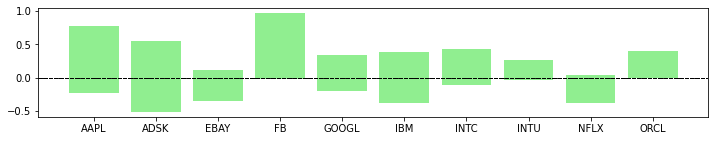

Episode 6/100 epsilon 0.1985


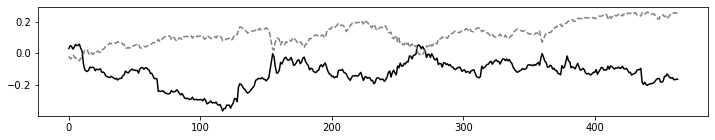

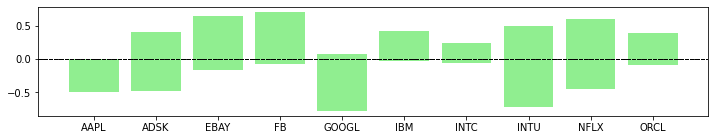

Episode 7/100 epsilon 0.1985


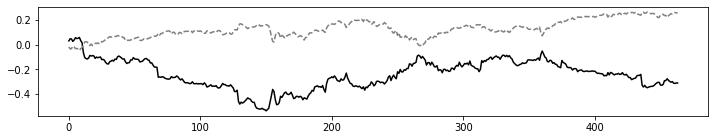

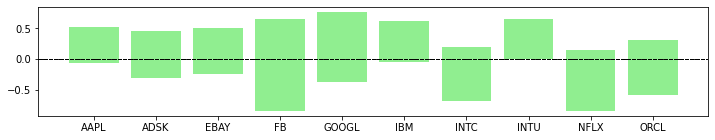

Episode 8/100 epsilon 0.198


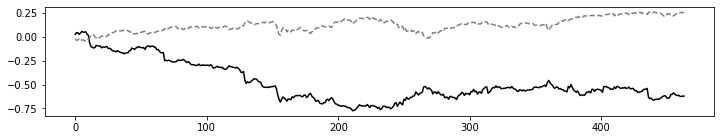

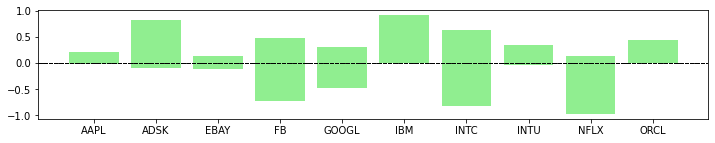

Episode 9/100 epsilon 0.198


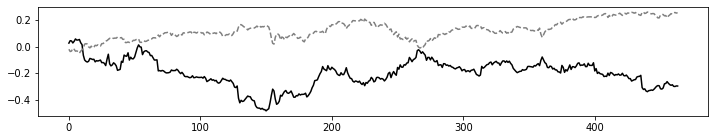

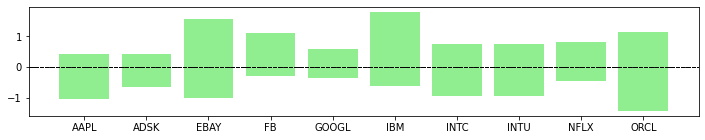

Episode 10/100 epsilon 0.1975


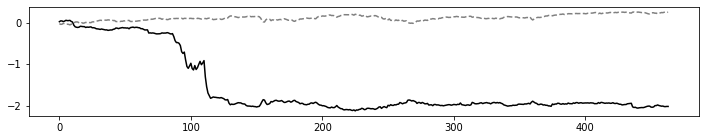

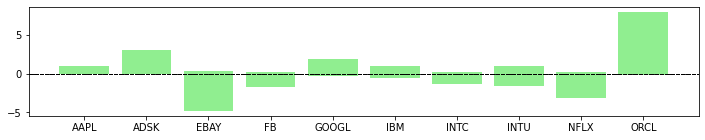

Episode 11/100 epsilon 0.1975


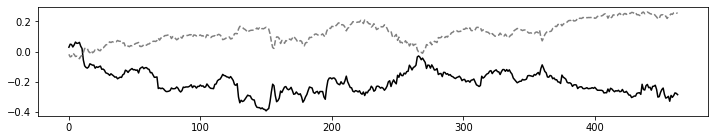

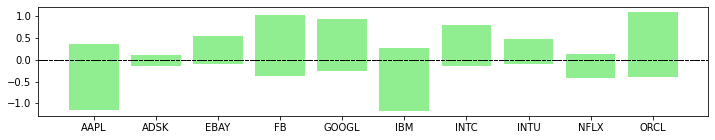

Episode 12/100 epsilon 0.197


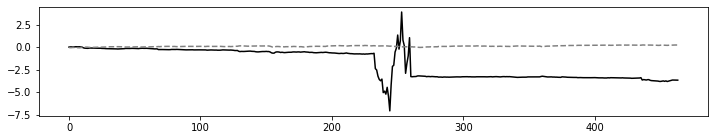

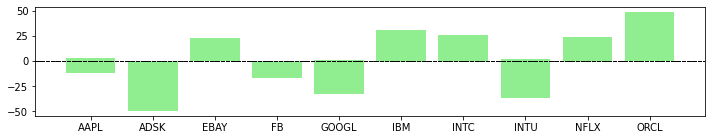

Episode 13/100 epsilon 0.197


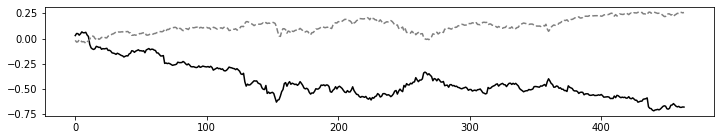

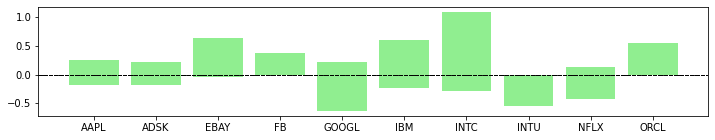

Episode 14/100 epsilon 0.1965


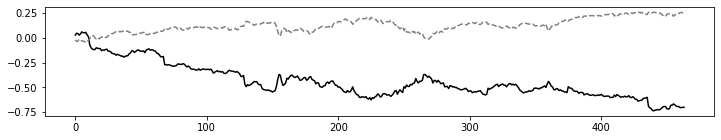

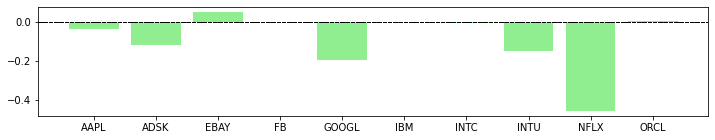

Episode 15/100 epsilon 0.1965


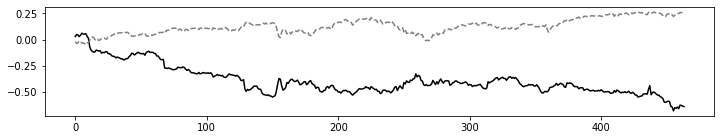

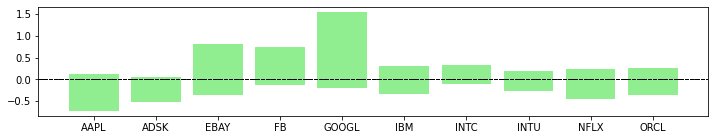

Episode 16/100 epsilon 0.196


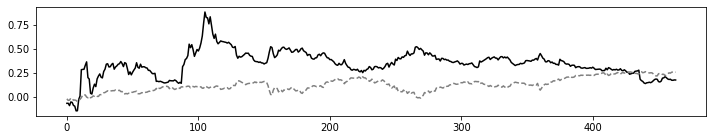

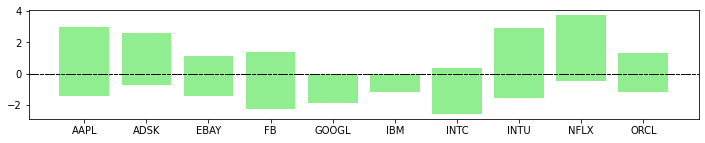

Episode 17/100 epsilon 0.196


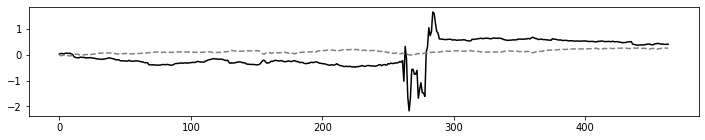

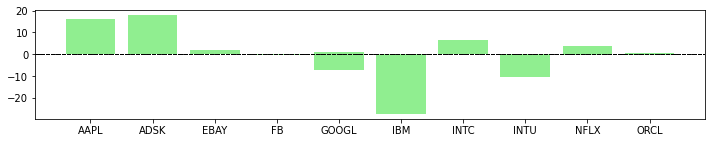

Episode 18/100 epsilon 0.1955


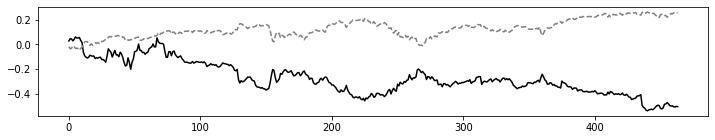

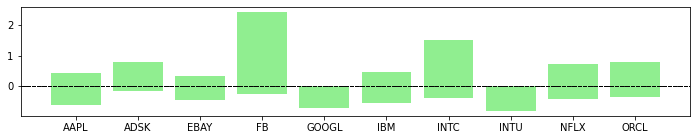

Episode 19/100 epsilon 0.1955


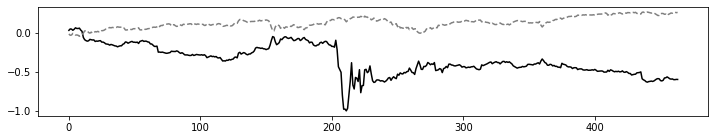

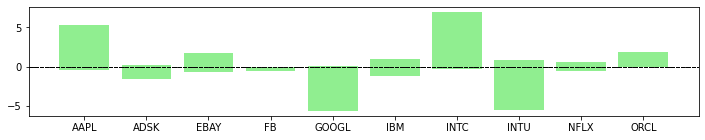

Episode 20/100 epsilon 0.195


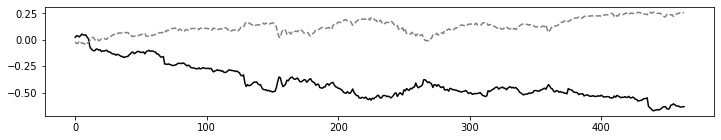

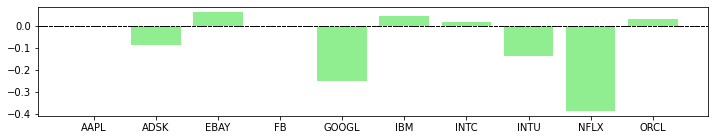

Episode 21/100 epsilon 0.195


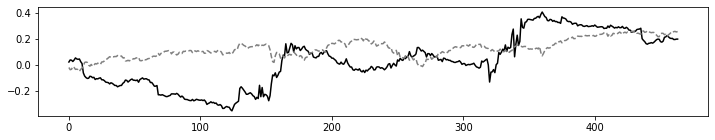

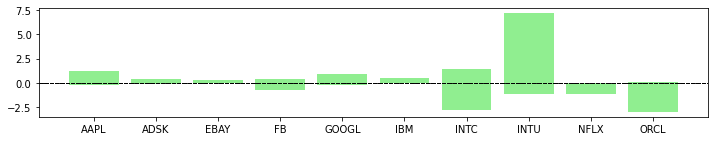

Episode 22/100 epsilon 0.1945


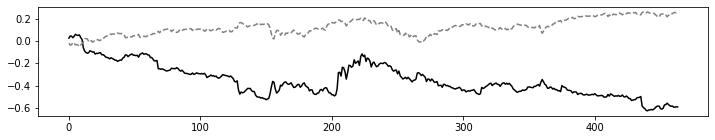

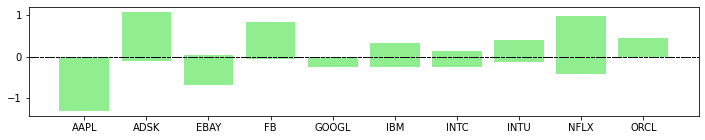

Episode 23/100 epsilon 0.1945


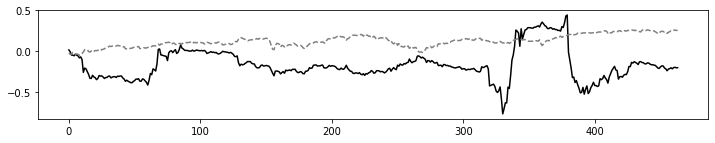

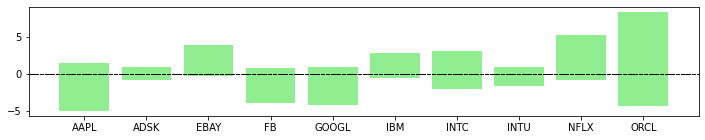

Episode 24/100 epsilon 0.194


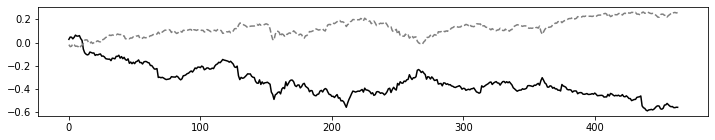

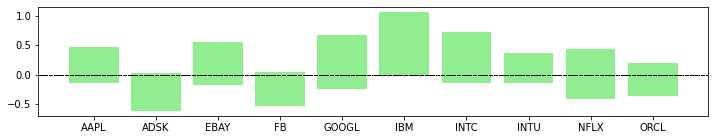

Episode 25/100 epsilon 0.194


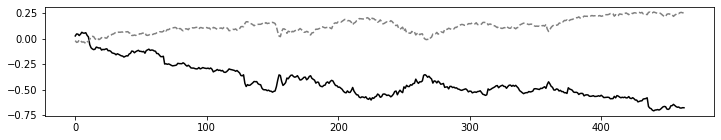

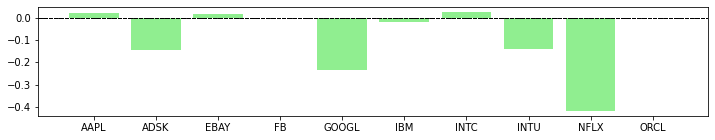

Episode 26/100 epsilon 0.1935


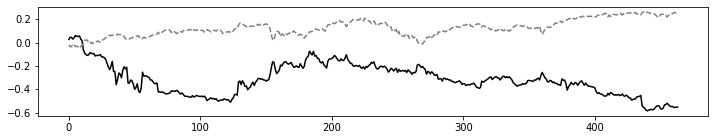

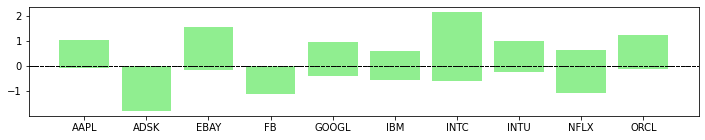

Episode 27/100 epsilon 0.1935


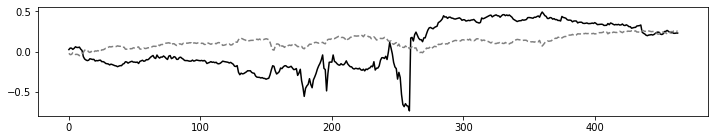

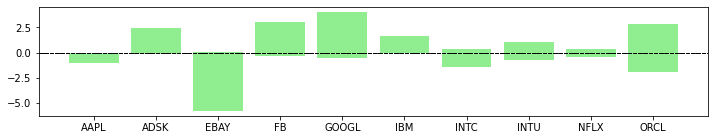

Episode 28/100 epsilon 0.193


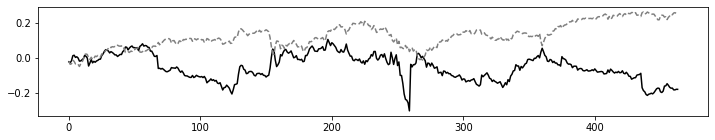

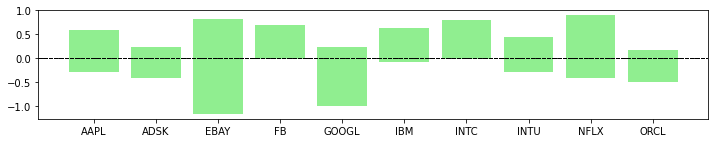

Episode 29/100 epsilon 0.193


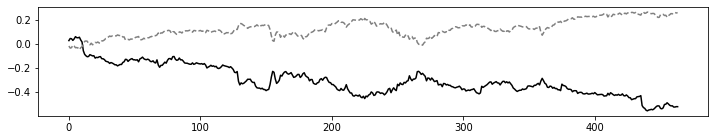

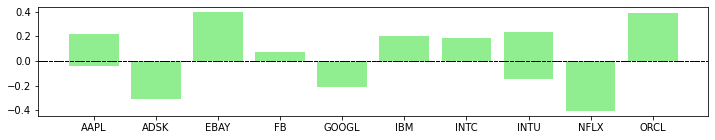

Episode 30/100 epsilon 0.1925


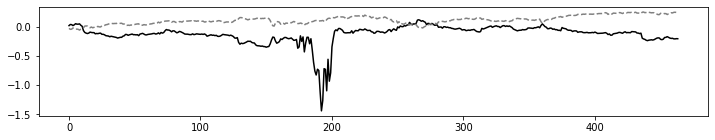

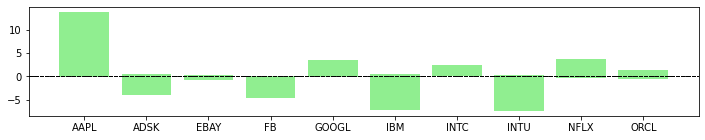

Episode 31/100 epsilon 0.1925


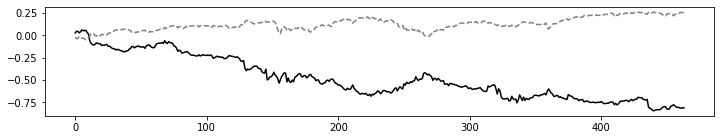

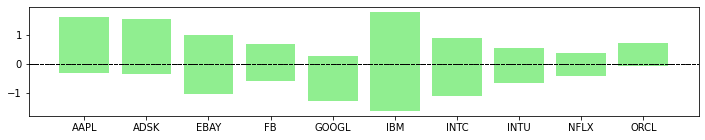

Episode 32/100 epsilon 0.192


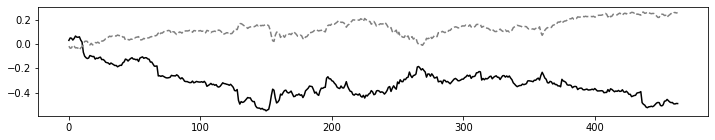

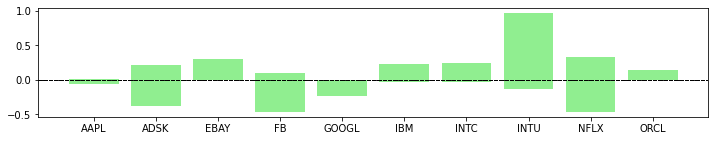

Episode 33/100 epsilon 0.192


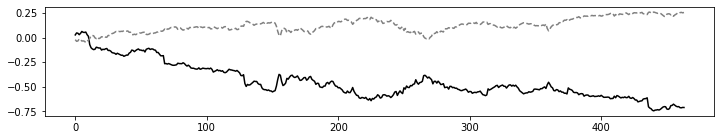

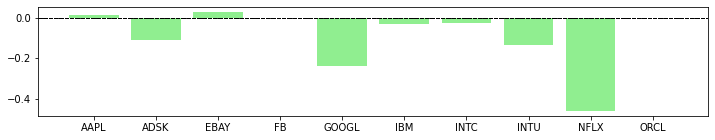

Episode 34/100 epsilon 0.1915


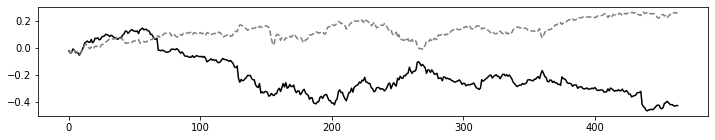

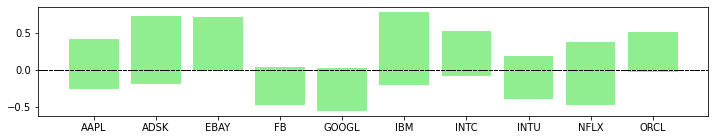

Episode 35/100 epsilon 0.1915


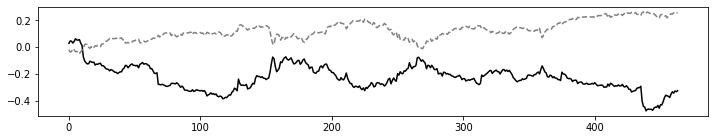

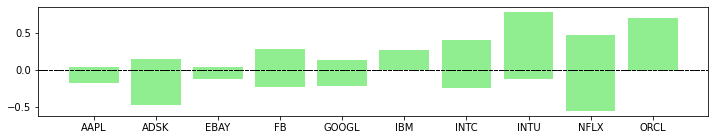

Episode 36/100 epsilon 0.191


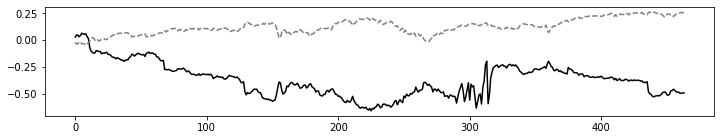

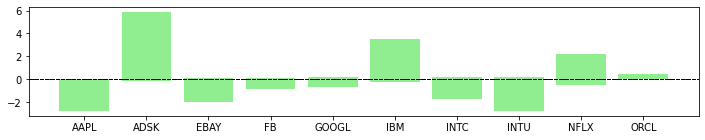

Episode 37/100 epsilon 0.191


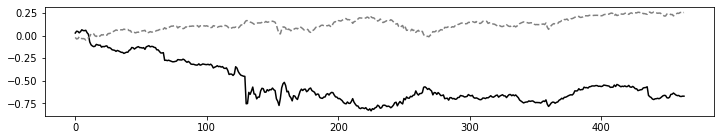

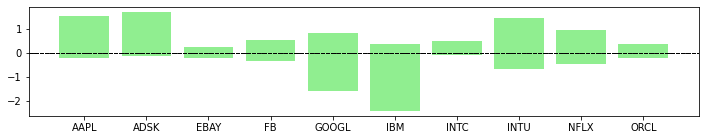

Episode 38/100 epsilon 0.1905


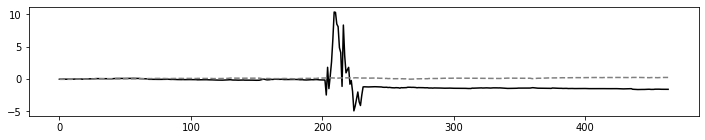

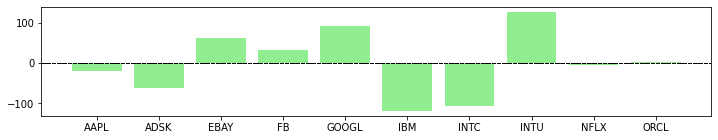

Episode 39/100 epsilon 0.1905


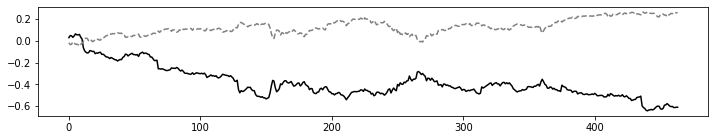

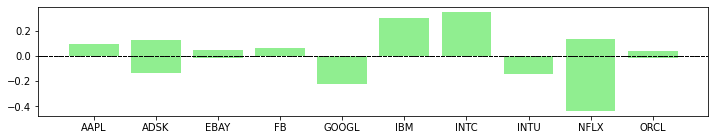

Episode 40/100 epsilon 0.19


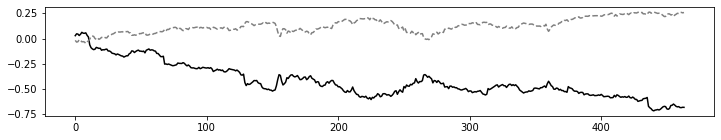

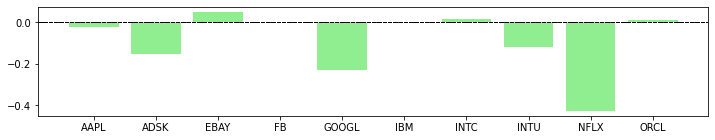

Episode 41/100 epsilon 0.19


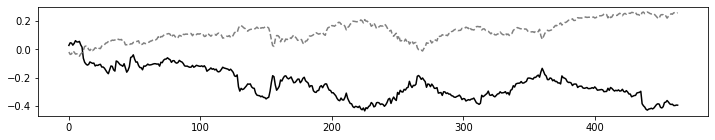

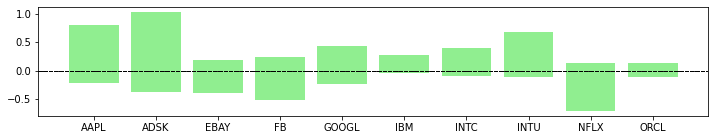

Episode 42/100 epsilon 0.1895


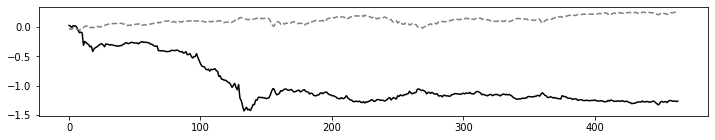

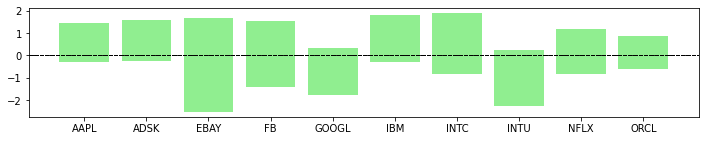

Episode 43/100 epsilon 0.1895


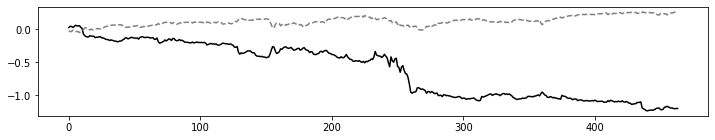

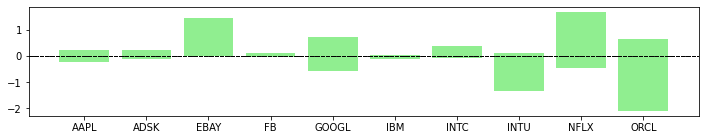

Episode 44/100 epsilon 0.189


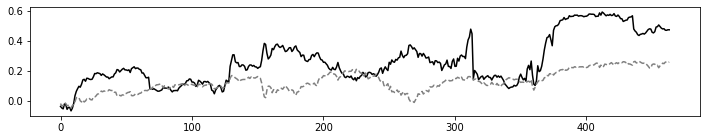

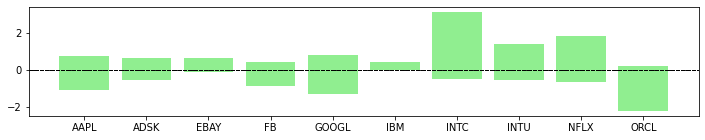

Episode 45/100 epsilon 0.189


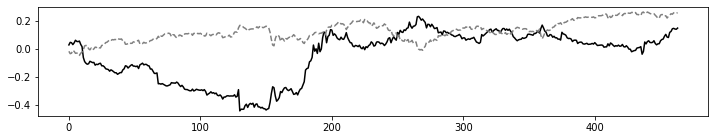

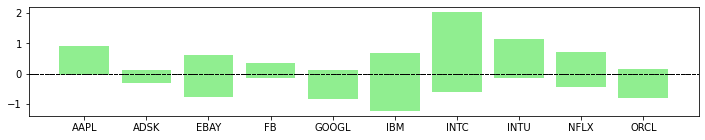

Episode 46/100 epsilon 0.1885


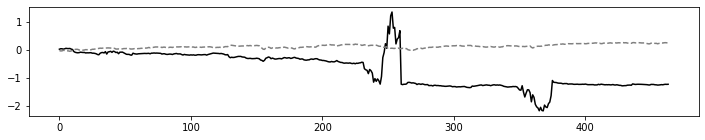

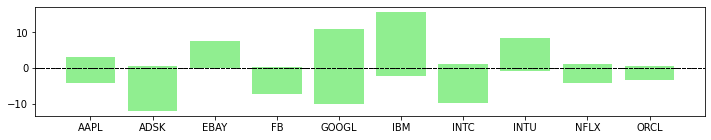

Episode 47/100 epsilon 0.1885


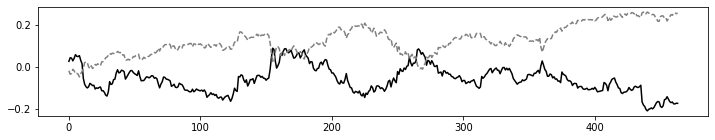

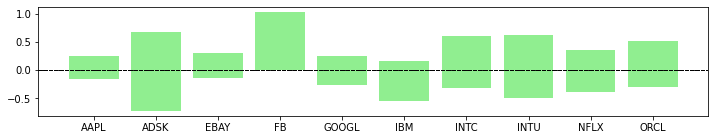

Episode 48/100 epsilon 0.188


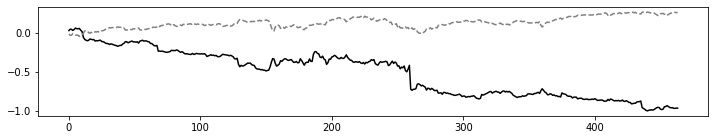

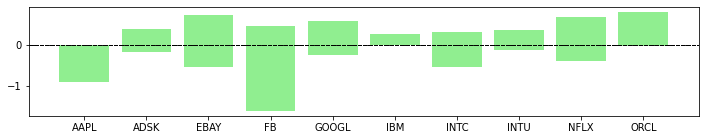

Episode 49/100 epsilon 0.188


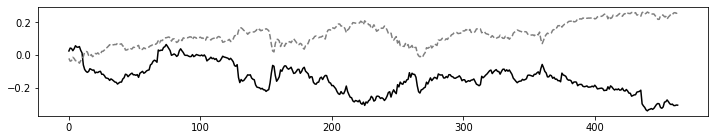

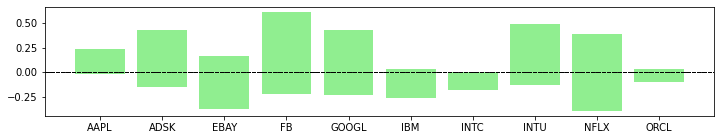

Episode 50/100 epsilon 0.1875


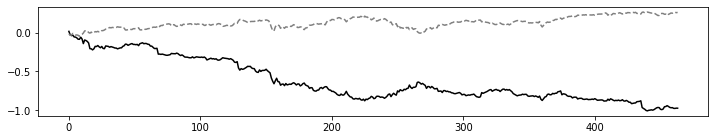

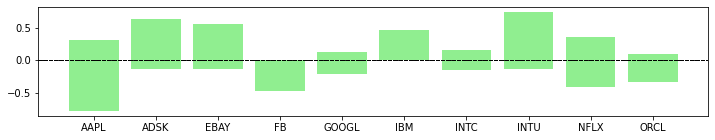

Episode 51/100 epsilon 0.1875


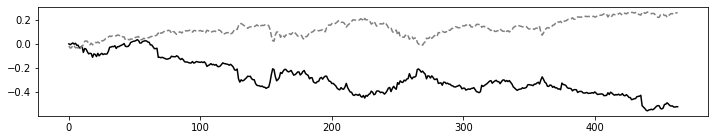

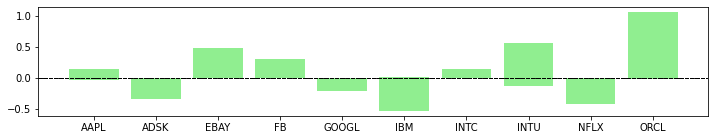

Episode 52/100 epsilon 0.187


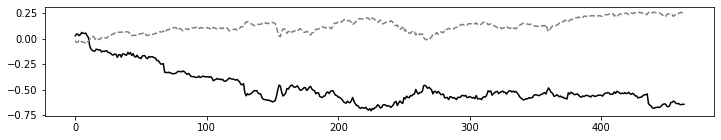

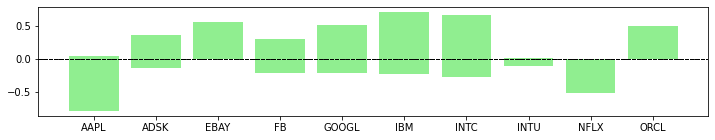

Episode 53/100 epsilon 0.187


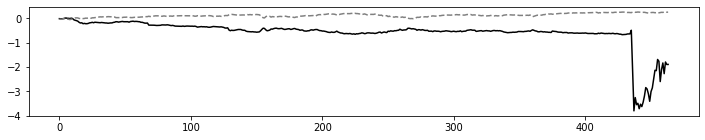

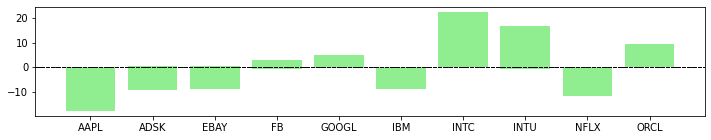

Episode 54/100 epsilon 0.1865


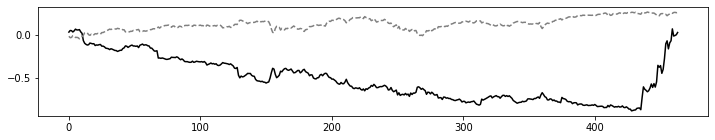

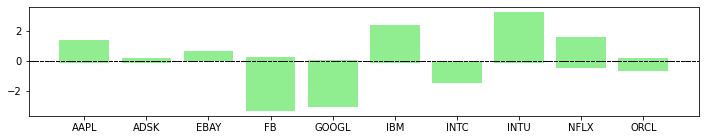

Episode 55/100 epsilon 0.1865


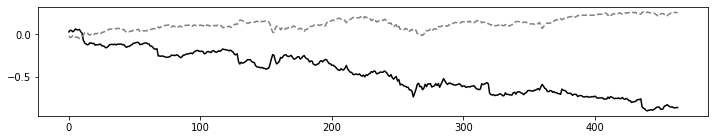

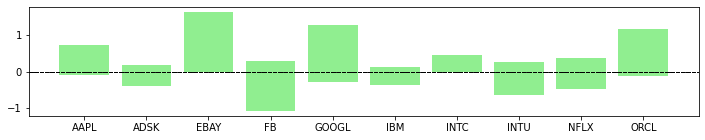

Episode 56/100 epsilon 0.186


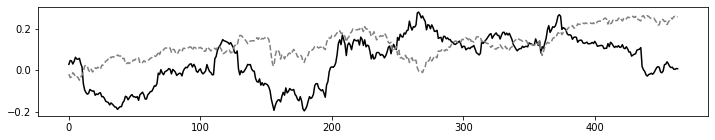

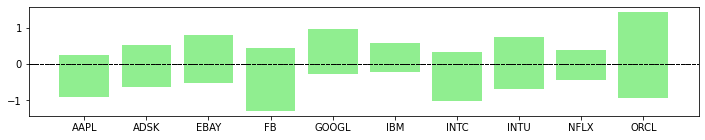

Episode 57/100 epsilon 0.186


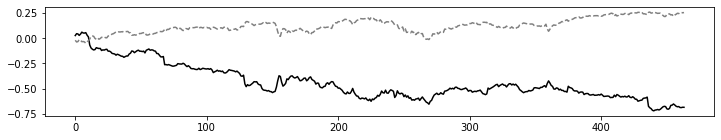

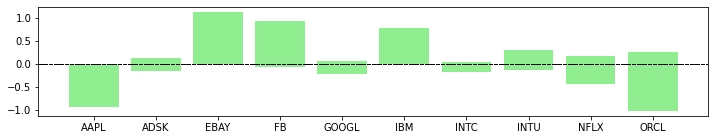

Episode 58/100 epsilon 0.1855


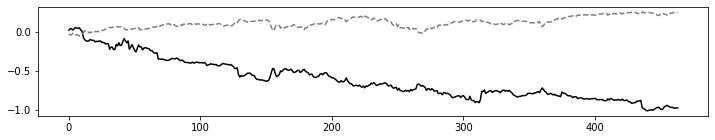

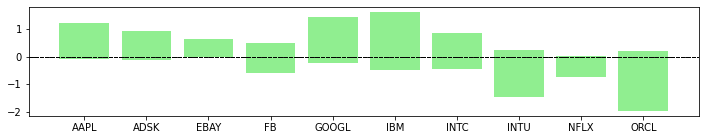

Episode 59/100 epsilon 0.1855


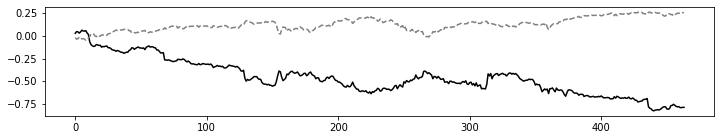

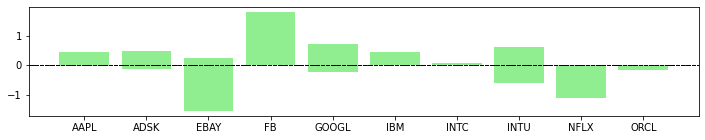

Episode 60/100 epsilon 0.185


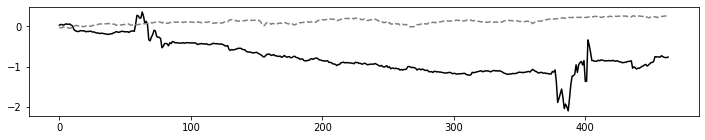

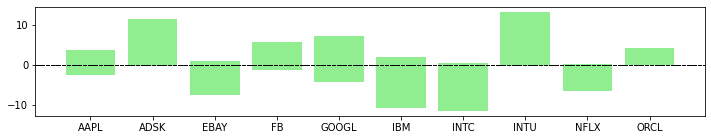

Episode 61/100 epsilon 0.185


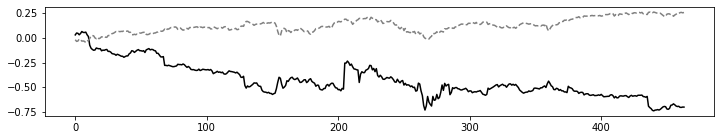

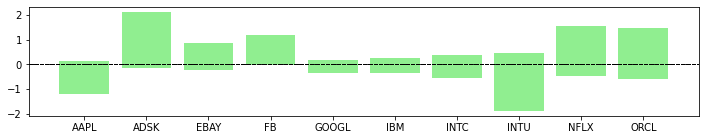

Episode 62/100 epsilon 0.1845


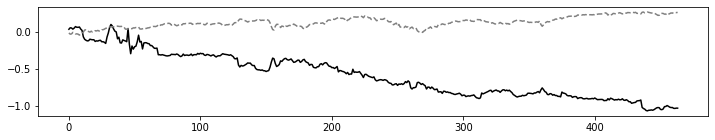

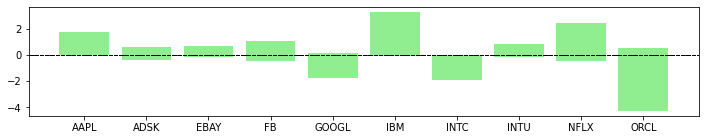

Episode 63/100 epsilon 0.1845


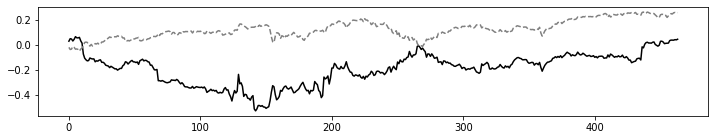

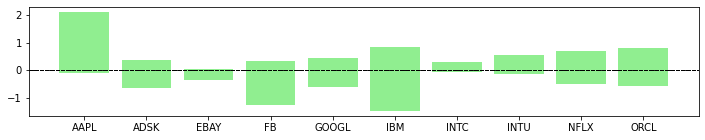

Episode 64/100 epsilon 0.184


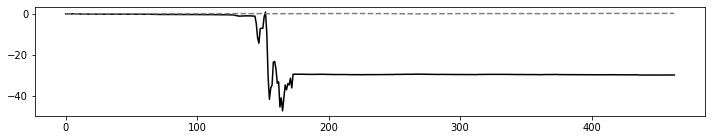

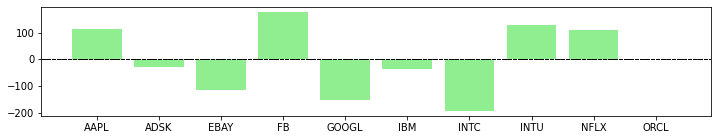

Episode 65/100 epsilon 0.184


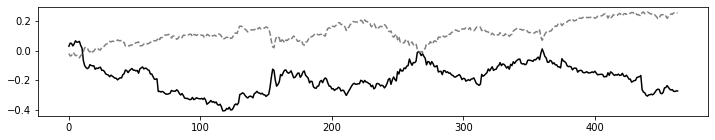

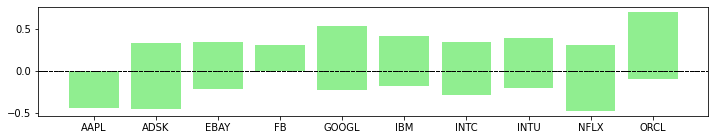

Episode 66/100 epsilon 0.1835


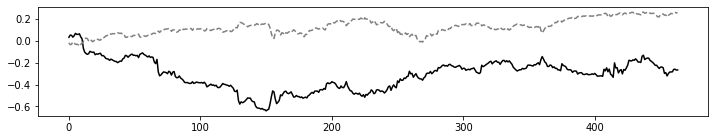

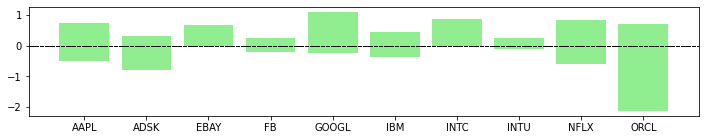

Episode 67/100 epsilon 0.1835


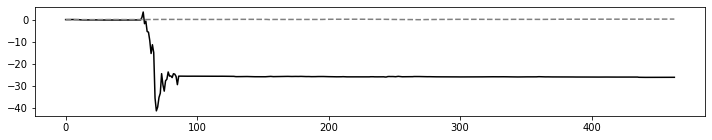

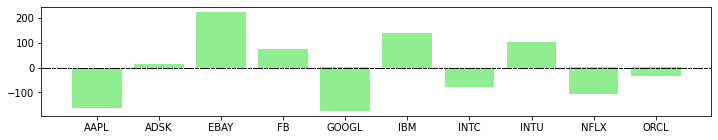

Episode 68/100 epsilon 0.183


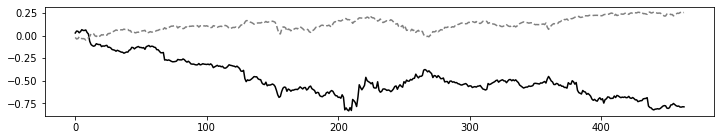

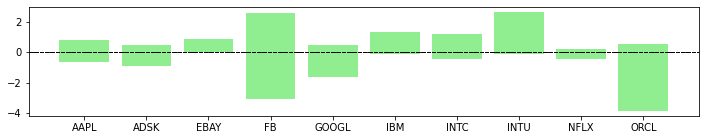

Episode 69/100 epsilon 0.183


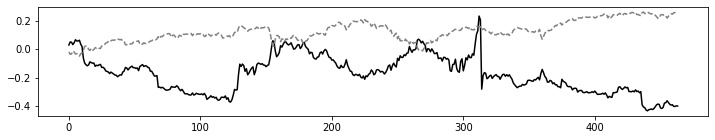

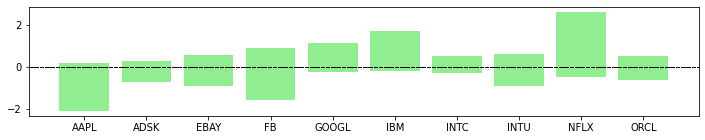

Episode 70/100 epsilon 0.1825


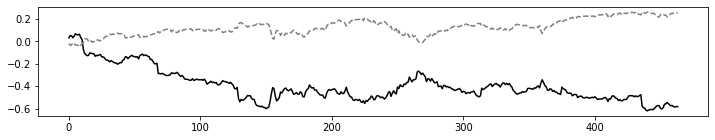

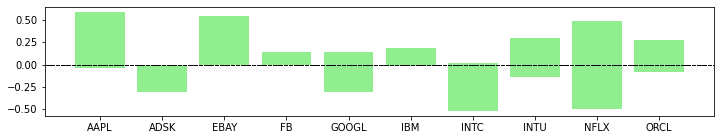

Episode 71/100 epsilon 0.1825


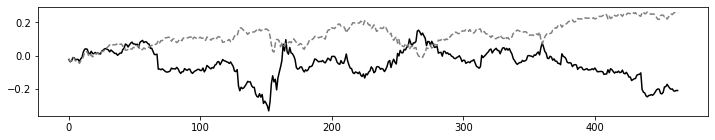

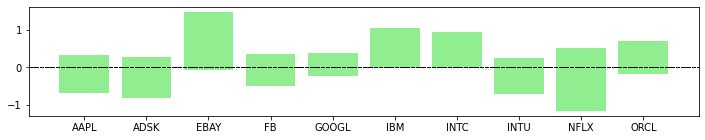

Episode 72/100 epsilon 0.182


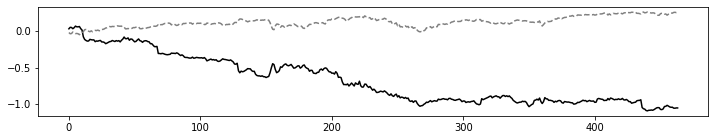

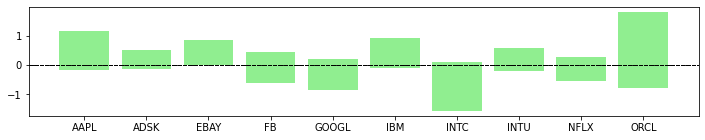

Episode 73/100 epsilon 0.182


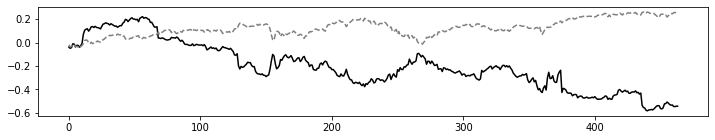

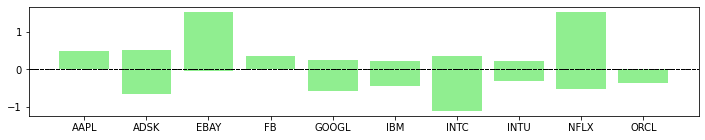

Episode 74/100 epsilon 0.1815


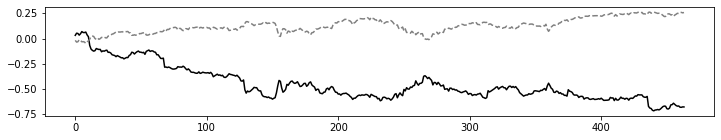

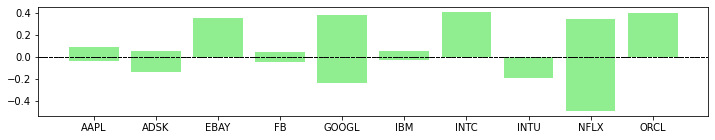

Episode 75/100 epsilon 0.1815


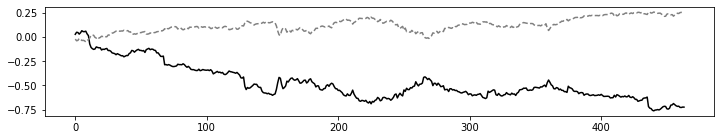

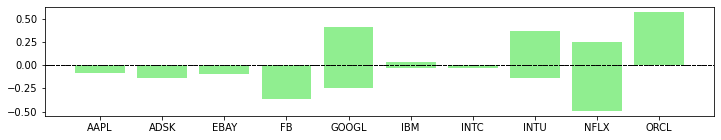

Episode 76/100 epsilon 0.181


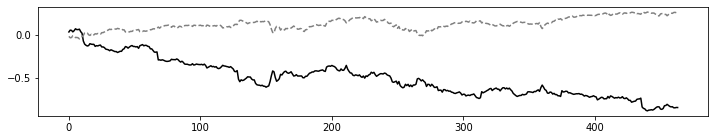

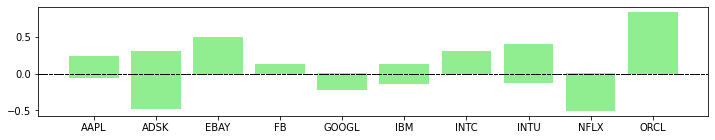

Episode 77/100 epsilon 0.181


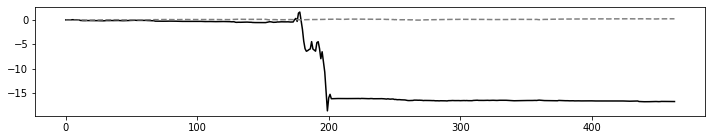

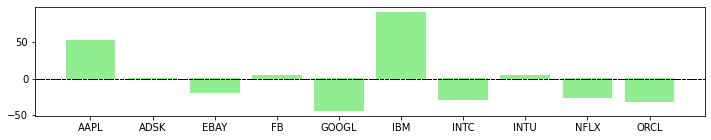

Episode 78/100 epsilon 0.1805


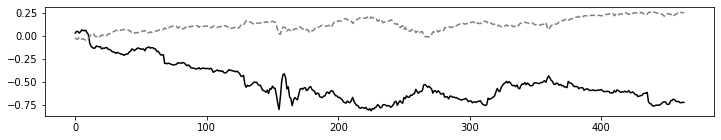

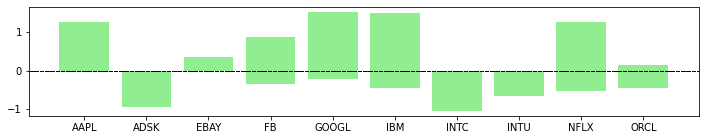

Episode 79/100 epsilon 0.1805


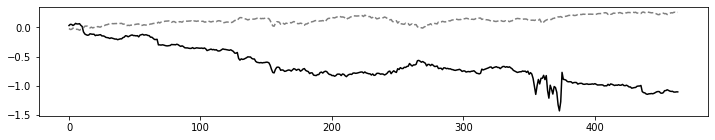

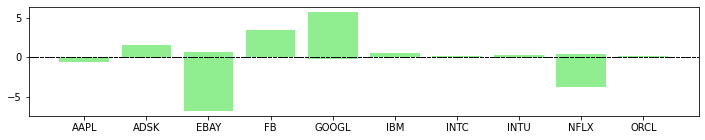

Episode 80/100 epsilon 0.18


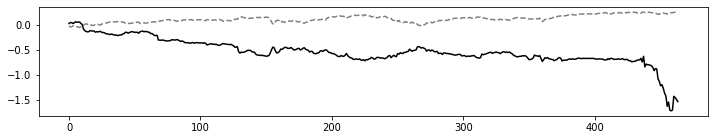

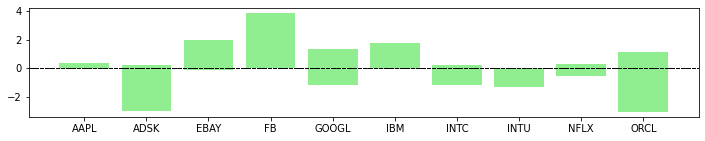

Episode 81/100 epsilon 0.18


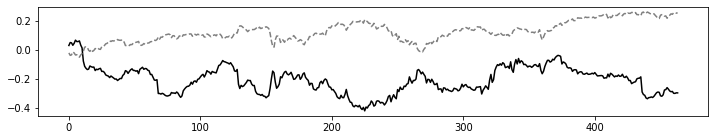

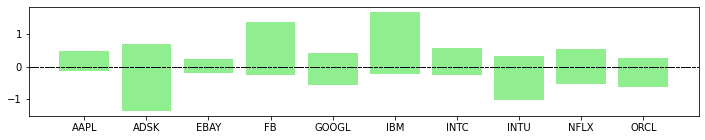

Episode 82/100 epsilon 0.1795


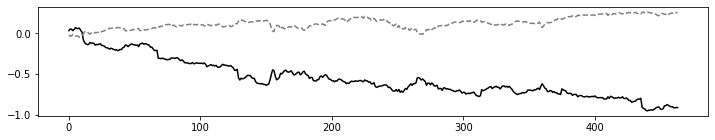

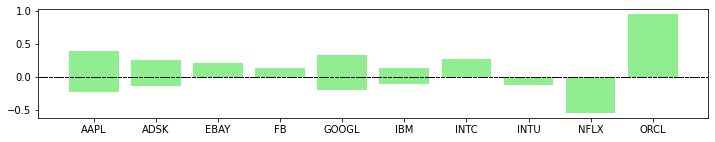

Episode 83/100 epsilon 0.1795


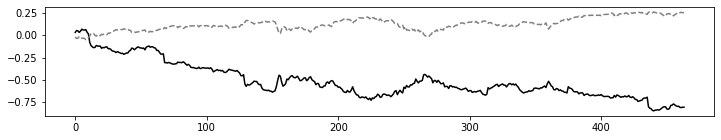

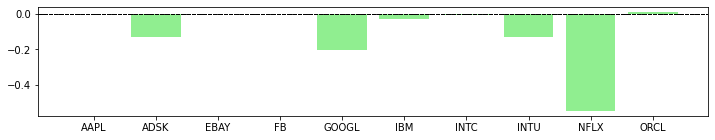

Episode 84/100 epsilon 0.179


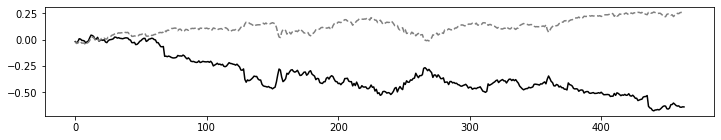

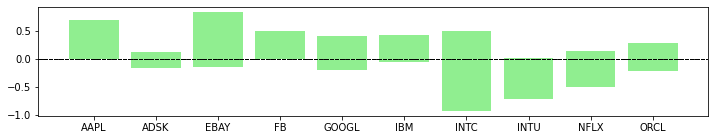

Episode 85/100 epsilon 0.179


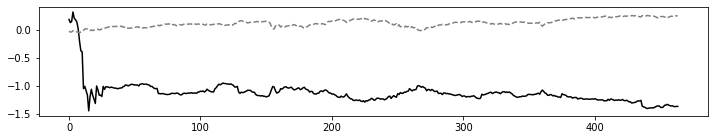

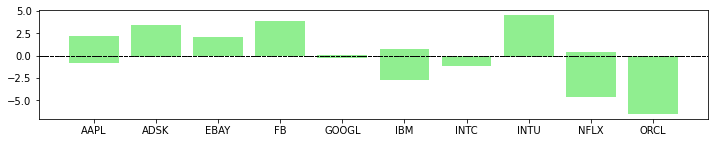

Episode 86/100 epsilon 0.1785


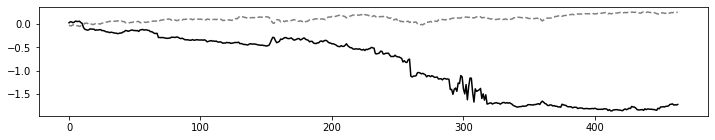

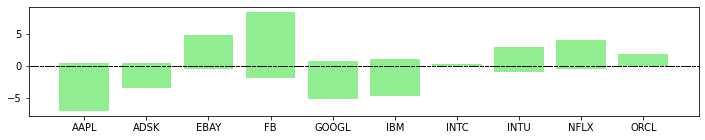

Episode 87/100 epsilon 0.1785


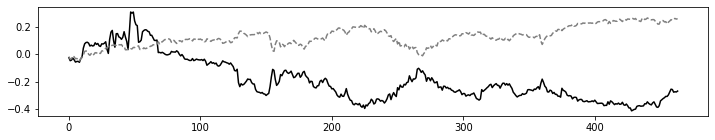

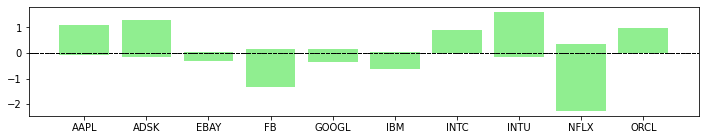

Episode 88/100 epsilon 0.178


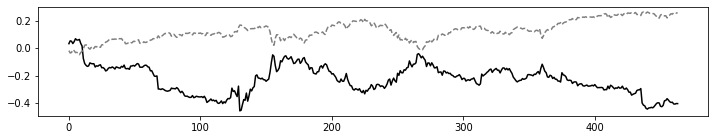

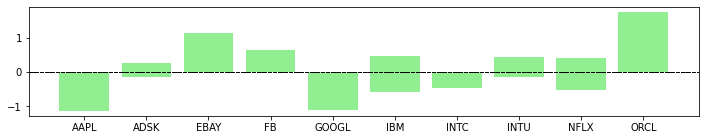

Episode 89/100 epsilon 0.178


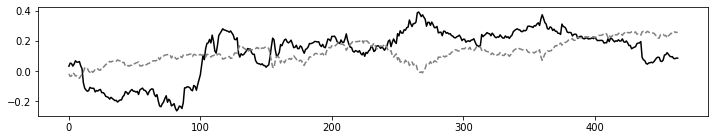

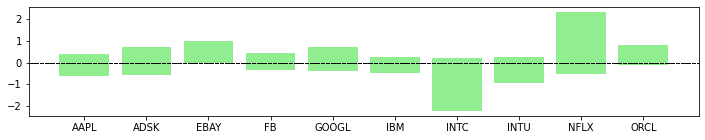

Episode 90/100 epsilon 0.1775


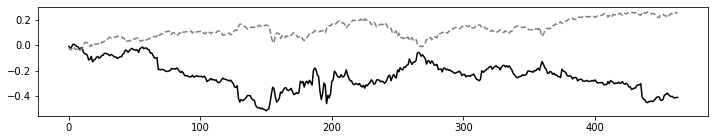

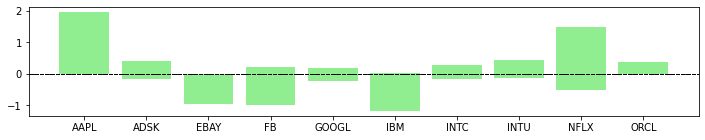

Episode 91/100 epsilon 0.1775


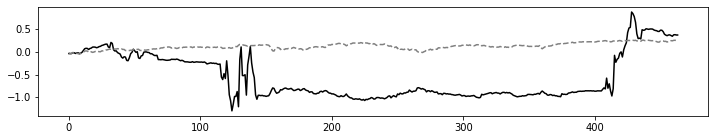

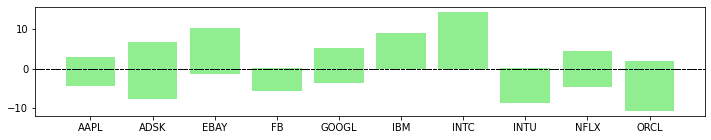

Episode 92/100 epsilon 0.177


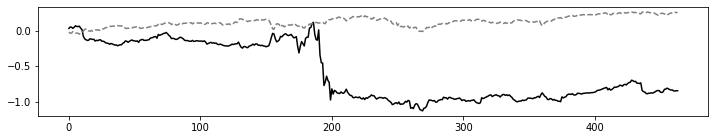

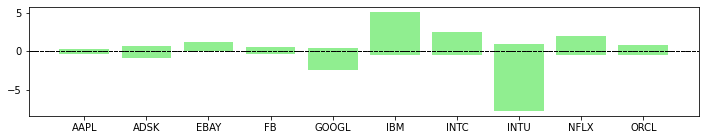

Episode 93/100 epsilon 0.177


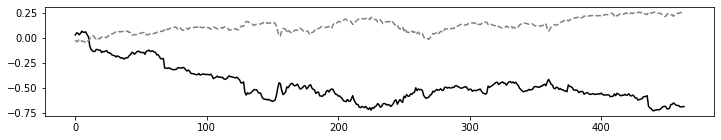

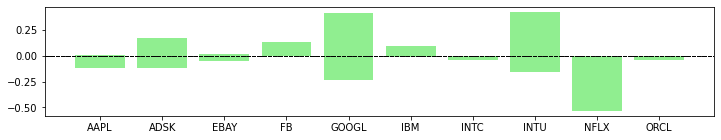

Episode 94/100 epsilon 0.1765


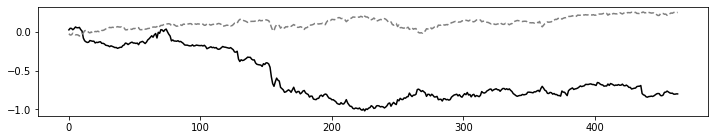

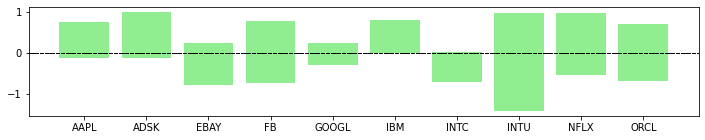

Episode 95/100 epsilon 0.1765


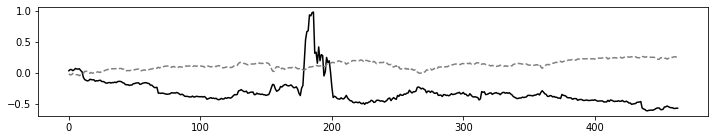

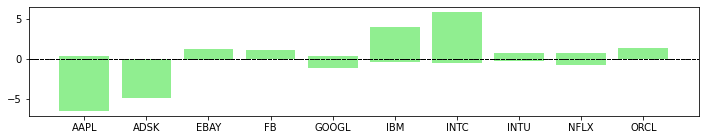

Episode 96/100 epsilon 0.176


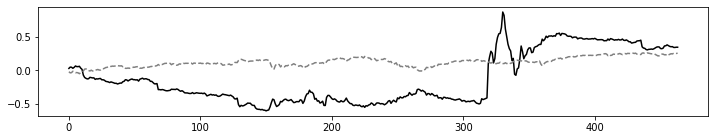

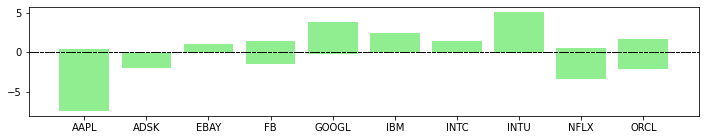

Episode 97/100 epsilon 0.176


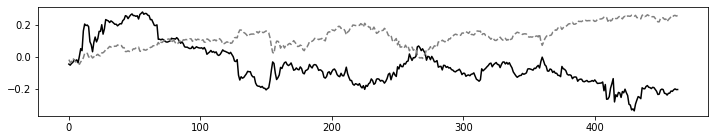

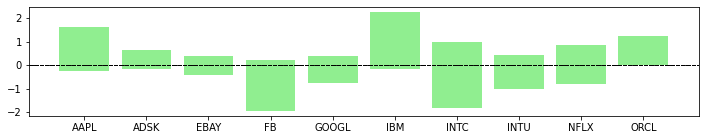

Episode 98/100 epsilon 0.1755


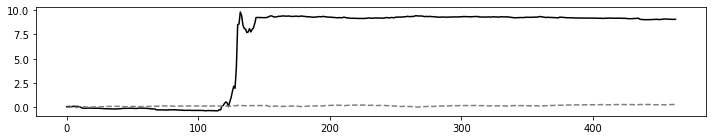

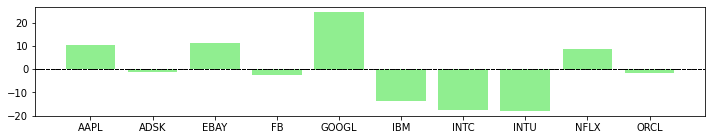

Episode 99/100 epsilon 0.1755


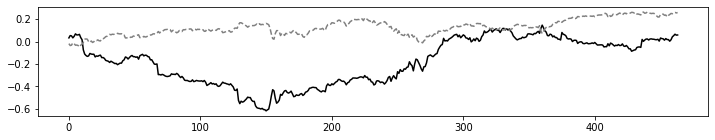

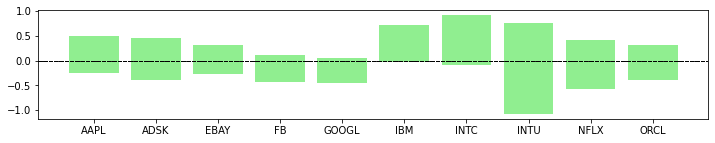

In [0]:
for e in range(EPISODES):
    
    agent.is_eval = False
    data_length = len(env.data)
    
    returns_history = []
    returns_history_equal = []
    
    rewards_history = []
    equal_rewards = []
    
    actions_to_show = []
    
    print("Episode " + str(e) + "/" + str(EPISODES), 'epsilon', agent.epsilon)

    s = env.get_state(np.random.randint(D_FIT+1, data_length-D_FIT-1), D_FIT)
    total_profit = 0 

    for t in range(D_FIT, data_length, REBALANCE):

        date1 = t-REBALANCE
        
        s_ = env.get_state(t, D_FIT)
        action = agent.act(s_)
        
        actions_to_show.append(action[0])

        weighted_returns, reward = env.get_reward(action[0], date1, t)
        weighted_returns_equal, reward_equal = env.get_reward(
            np.ones(agent.portfolio_size) / agent.portfolio_size, date1, t)

        rewards_history.append(reward)
        equal_rewards.append(reward_equal)
        returns_history.extend(weighted_returns)
        returns_history_equal.extend(weighted_returns_equal)

        done = True if t == data_length else False
        agent.memory4replay.append((s, s_, action, reward, done))
        
        if len(agent.memory4replay) >= BATCH:
            agent.expReplay(BATCH)
            agent.memory4replay = []
            
        s = s_

    rl_result = np.array(returns_history).cumsum()
    equal_result = np.array(returns_history_equal).cumsum()

    plt.figure(figsize = (12, 2))
    plt.plot(rl_result, color = 'black', ls = '-')
    plt.plot(equal_result, color = 'grey', ls = '--')
    plt.show()
    
    plt.figure(figsize = (12, 2))
    for a in actions_to_show:    
        
        plt.bar(env.data.columns, a, color='lightgreen')
        plt.axhline(y=0,linewidth=1, color='k', linestyle='--')


    plt.show()
    

# RL Agent. Test


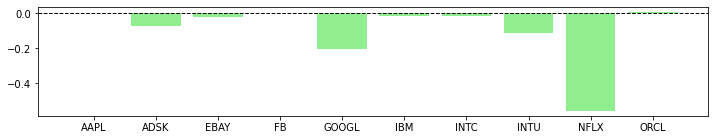

In [0]:
env = Environment(test_data)
agent.is_eval = True

actions_equal, actions_rl = [], []
result_equal, result_rl = [], []

actions_to_show=[]

for t in range(window_size, len(env.data), rebalance_period):

    date1 = t-rebalance_period
    s_ = env.get_state(t, window_size)
    action = agent.act(s_)

    weighted_returns, reward = env.get_reward(action[0], date1, t)
    weighted_returns_equal, reward_equal = env.get_reward(
        np.ones(agent.portfolio_size) / agent.portfolio_size, date1, t)

    result_equal.append(weighted_returns_equal.tolist())
    actions_equal.append(np.ones(agent.portfolio_size) / agent.portfolio_size)
    
    result_rl.append(weighted_returns.tolist())
    actions_rl.append(action[0])
    
plt.figure(figsize = (12, 2))
plt.bar(env.data.columns, actions_rl[1], color='lightgreen')
plt.axhline(y=0,linewidth=1, color='k', linestyle='--')


plt.savefig('foo6.png', bbox_inches='tight')
    

In [0]:
result_equal_vis = [item for sublist in result_equal for item in sublist]
result_rl_vis = [item for sublist in result_rl for item in sublist]

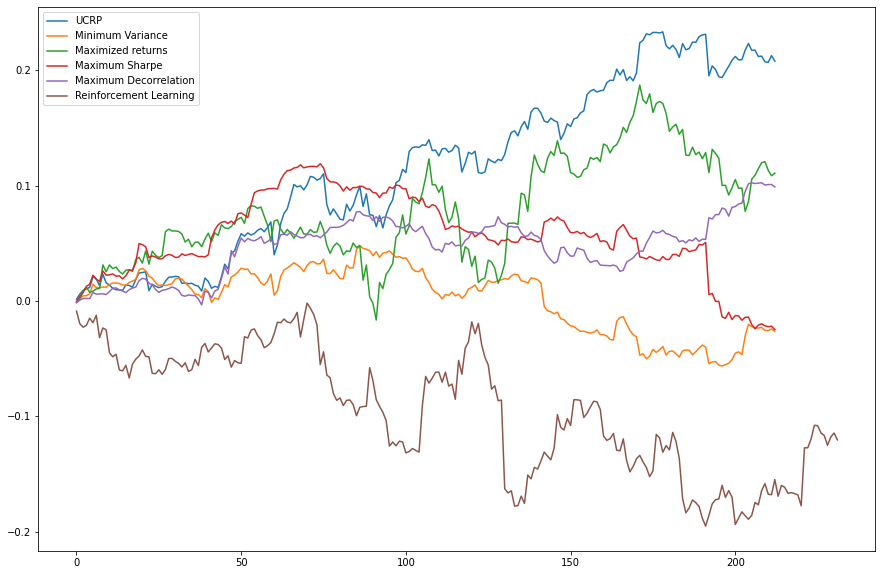

In [0]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(np.array(result_equal_vis).cumsum(), label='UCRP')
ax.plot(np.array(result_minvar_vis).cumsum(),label='Minimum Variance')
ax.plot(np.array(result_returns_vis).cumsum(), label='Maximized returns')
ax.plot(np.array(result_maxsharpe_vis).cumsum(), label='Maximum Sharpe')
ax.plot(np.array(result_maxdecorr_vis).cumsum(), label='Maximum Decorrelation')
ax.plot((np.array(result_rl_vis)).cumsum(), label='Reinforcement Learning')
leg = ax.legend();
plt.savefig('foo5.png', bbox_inches='tight')